# INFOTECH ACADEMY MACHINE LEARNING-1 HOMEWORK

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier, Pool
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import pathlib 
from IPython.core.display import HTML

### Load Dataset

In [127]:
df = pd.read_csv('titanic_dataset.csv')
df.head(5).style.background_gradient()

,Unnamed: 0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.000000,False,0.000000,0.000000,0.000000,0.000000,0.000000,Maham Ofracculy,False
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.000000,False,109.000000,9.000000,25.000000,549.000000,44.000000,Juanna Vines,True
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.000000,True,43.000000,3576.000000,0.000000,6715.000000,49.000000,Altark Susent,False
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.000000,False,0.000000,1283.000000,371.000000,3329.000000,193.000000,Solam Susent,False
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.000000,False,303.000000,70.000000,151.000000,565.000000,2.000000,Willy Santantines,True


## Step 1: Define the Problem

Clearly define the problem you want to solve using the Titanic dataset. For example, you could predict whether a passenger survived or not based on various features.

Predict which passengers are transported to an alternate dimension

## Step 2: Gather and Explore the Data

Obtain the Titanic dataset from a reliable source, such as Kaggle.
Explore the dataset to understand its structure and variables.
Identify the features that are available and their potential relevance to the problem.

**This data set contains information of 12970 passengers.**

**PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

**HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

**Destination** - The planet the passenger will be debarking to.

**Age** - The age of the passenger.

**VIP** - Whether the passenger has paid for special VIP service during the voyage.

**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

**Name** - The first and last names of the passenger.

**Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## Step 3: Preprocess the Data

* Handle missing values by imputing or removing them appropriately.
* Detect and handle outliers using techniques such as:
    - **Visualization** : Plot box plots or histograms to identify potential outliers.
    - **Statistical methods**: Calculate z-scores or interquartile ranges to identify and handle outliers.
* Transform categorical variables into numerical representations (e.g., one-hot encoding).
* Normalize or scale numerical features as needed.

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12970 non-null  int64  
 1   PassengerId   12970 non-null  object 
 2   HomePlanet    12682 non-null  object 
 3   CryoSleep     12660 non-null  object 
 4   Cabin         12671 non-null  object 
 5   Destination   12696 non-null  object 
 6   Age           12700 non-null  float64
 7   VIP           12674 non-null  object 
 8   RoomService   12707 non-null  float64
 9   FoodCourt     12681 non-null  float64
 10  ShoppingMall  12664 non-null  float64
 11  Spa           12686 non-null  float64
 12  VRDeck        12702 non-null  float64
 13  Name          12676 non-null  object 
 14  Transported   12970 non-null  bool   
dtypes: bool(1), float64(6), int64(1), object(7)
memory usage: 1.4+ MB


In [129]:
df.shape

(12970, 15)

In [130]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,12970.0,3617.887741,2408.607419,0.0,1621.0,3242.0,5449.75,8692.0
Age,12700.0,28.771969,14.387261,0.0,19.0,27.0,38.00,79.0
RoomService,12707.0,222.897852,647.596664,0.0,0.0,0.0,49.00,14327.0
FoodCourt,12681.0,451.961675,1584.370747,0.0,0.0,0.0,77.00,29813.0
ShoppingMall,12664.0,174.906033,590.558690,0.0,0.0,0.0,29.00,23492.0
Spa,12686.0,308.476904,1130.279641,0.0,0.0,0.0,57.00,22408.0
VRDeck,12702.0,306.789482,1180.097223,0.0,0.0,0.0,42.00,24133.0


In [131]:
def summary(df):
    summary = pd.DataFrame(index=df.columns)
    summary["Unique"] = df.nunique().values
    summary["Missing"] = df.isnull().sum()
    summary["Duplicated"] = df.duplicated().sum()
    summary["Types"] = df.dtypes
    summary_styled = summary.style.background_gradient()
    
    return summary_styled

summary(df)

,Unique,Missing,Duplicated,Types
Unnamed: 0,8693,0,0,int64
PassengerId,12970,0,0,object
HomePlanet,3,288,0,object
CryoSleep,2,310,0,object
Cabin,9825,299,0,object
Destination,3,274,0,object
Age,80,270,0,float64
VIP,2,296,0,object
RoomService,1578,263,0,float64
FoodCourt,1953,289,0,float64


In [132]:
df = df.drop(df.columns[0], axis=1)

In [133]:
def multi_table(table_list):
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

In [134]:
#Check for categorical value
columns_to_show = ['VIP', 'HomePlanet', 'CryoSleep', 'Destination', 'Transported']
multi_table([pd.DataFrame(df[i].value_counts()) for i in columns_to_show])

,VIP
False,12401
True,273
,HomePlanet
Earth,6865
Europa,3133
Mars,2684
,CryoSleep
False,8079
True,4581
,Destination


In [135]:
numerical_variables = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_variables

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [136]:
categorical_variables = df.select_dtypes(include=['object']).columns
categorical_variables 

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

In [137]:
missing_percentage = df.isnull().sum() / len(df) * 100

# Print the columns with missing values and their percentages
for column in missing_percentage.index:
    percentage = missing_percentage[column]
    print(f"{column}: {percentage}%")
# The percentile of empty values is 2.39 at most. We can ignore the effect because it is below 5

PassengerId: 0.0%
HomePlanet: 2.220508866615266%
CryoSleep: 2.3901310717039324%
Cabin: 2.305319969159599%
Destination: 2.1125674633770237%
Age: 2.081727062451812%
VIP: 2.28218966846569%
RoomService: 2.027756360832691%
FoodCourt: 2.228218966846569%
ShoppingMall: 2.3592906707787202%
Spa: 2.1896684656900542%
VRDeck: 2.0663068619892058%
Name: 2.266769468003084%
Transported: 0.0%


<Axes: >

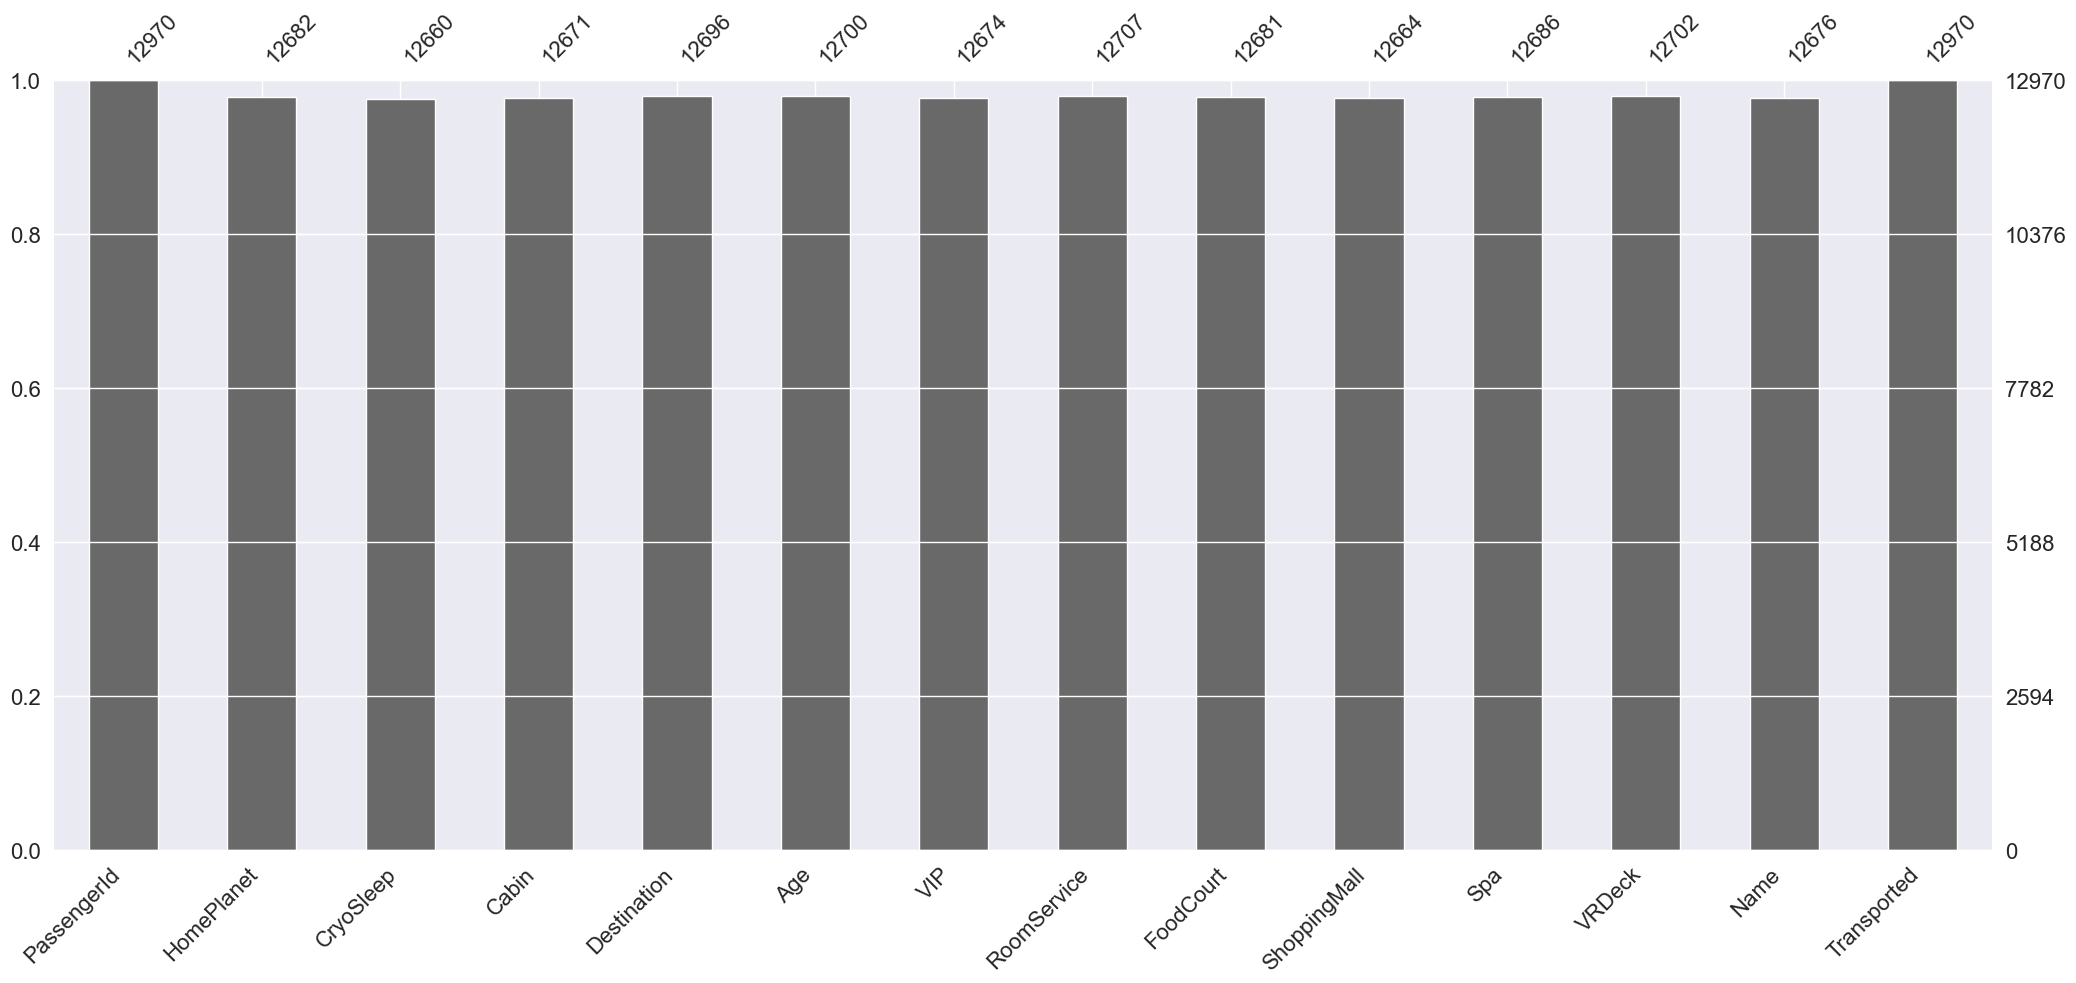

In [138]:
import missingno as msno
msno.bar(df)

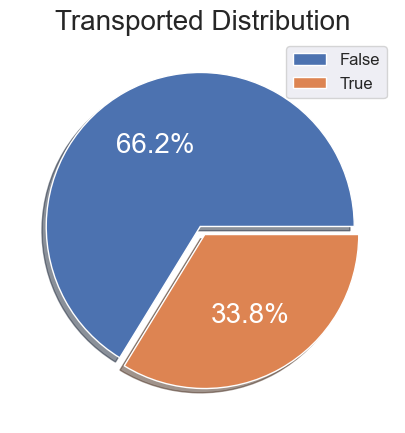

In [139]:
# Target distribution
plt.subplots(figsize=(15, 5))
plt.pie(df.Transported.value_counts(), shadow=True, explode=[.03,.03], autopct='%1.1f%%', textprops={'fontsize': 20, 'color': 'white'})
plt.title('Transported Distribution', size=20)
plt.legend(['False', 'True'], loc='best', fontsize=12)
plt.show()

In [140]:
# from imblearn.under_sampling import RandomUnderSampler

# # rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
# X_res, y_res = rus.fit_resample(X, y) #res= re sampling

# ax = y_res.value_counts().plot.pie(autopct='%.2f')
# _ = ax.set_title("Under-sampling")

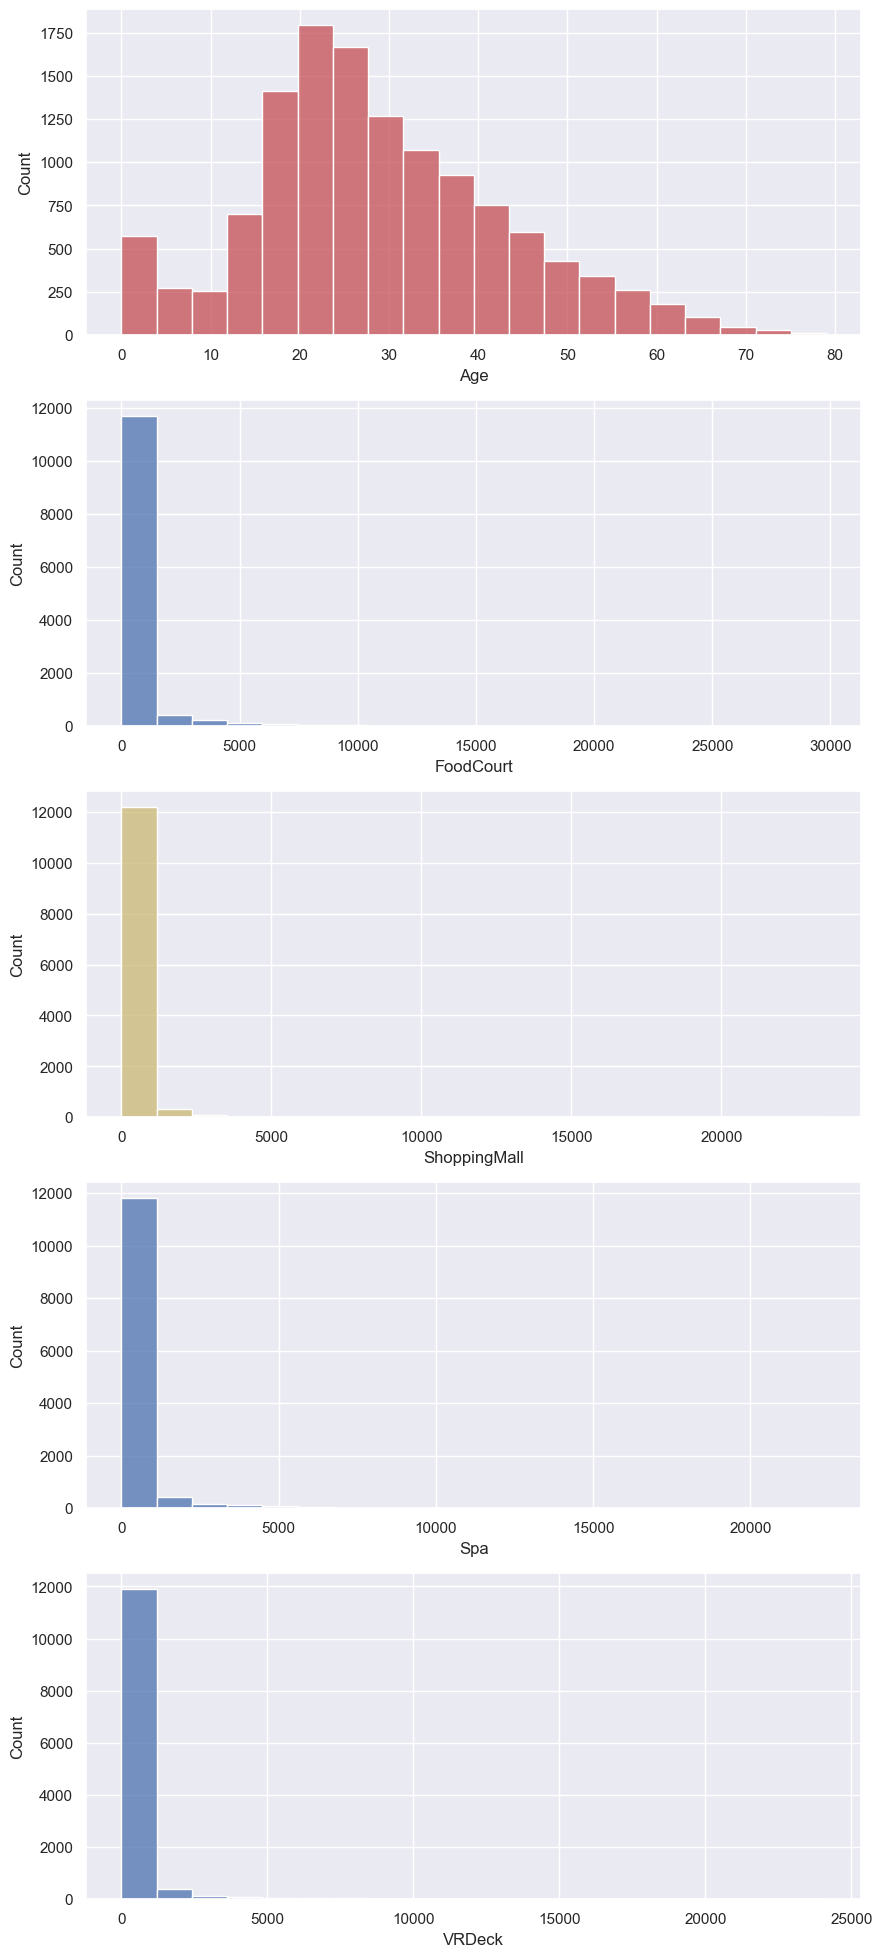

In [141]:
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(df['Age'], color='r', bins=20, ax=ax[0]);
sns.histplot(df['FoodCourt'], color='b', bins=20, ax=ax[1]);
sns.histplot(df['ShoppingMall'], color='y', bins=20, ax=ax[2]);
sns.histplot(df['Spa'], color='b', bins=20, ax=ax[3]);
sns.histplot(df['VRDeck'], color='b', bins=20, ax=ax[4]);

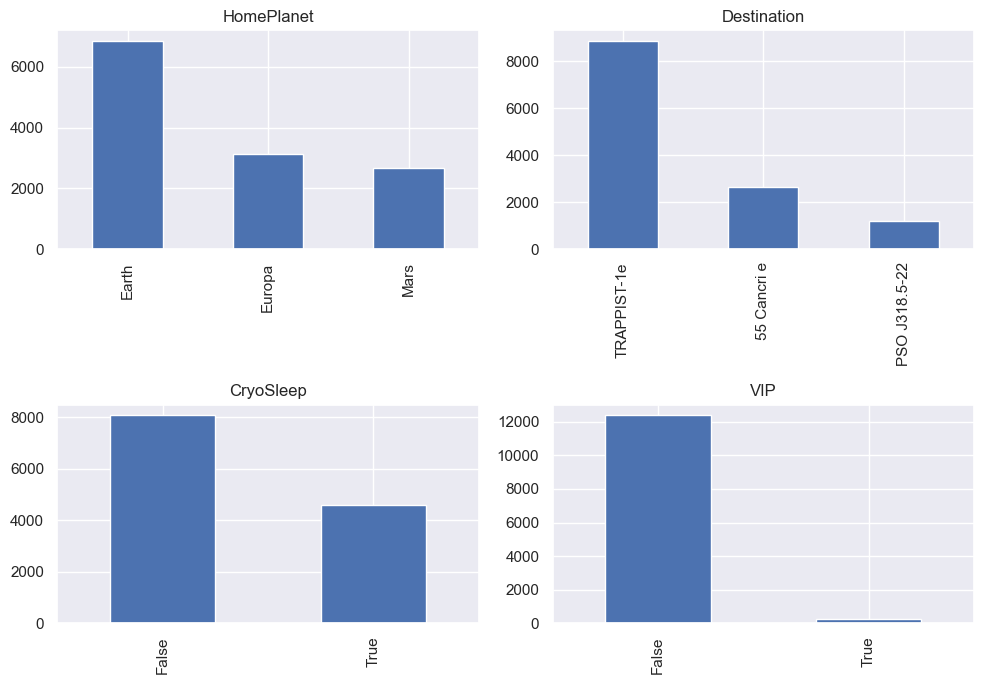

In [142]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
df['HomePlanet'].value_counts().plot(kind='bar', title='HomePlanet')
plt.subplot(2,2,2)
df['Destination'].value_counts().plot(kind='bar', title='Destination')
plt.subplot(2,2,3)
df['CryoSleep'].value_counts().plot(kind='bar', title='CryoSleep')
plt.subplot(2,2,4)
df['VIP'].value_counts().plot(kind='bar',title='VIP')
plt.tight_layout();

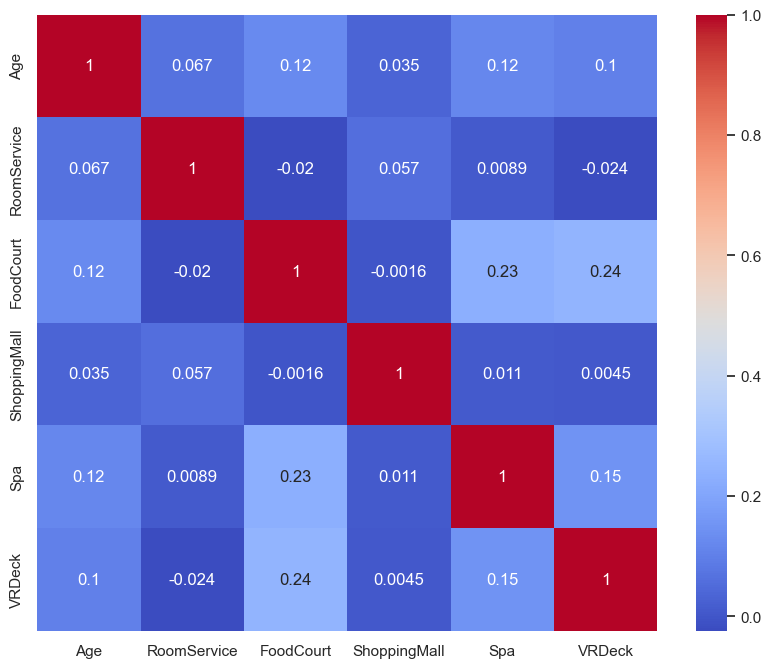

In [143]:
corr_matrix = df[numerical_variables].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

**Handling Missing Values**

In [144]:
#If the passenger is CryoSleep, they will be asleep. Can't spend money. These columns can be set to 0.
Expenses_columns = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
df.loc[:,Expenses_columns]=df.apply(lambda x: 0 if x.CryoSleep == True else x,axis =1)

In [145]:
# If the age of the passenger is less than 13, I set the specified column values to 0.
def fill_nans_by_age(df, age_limit = 13):
    df['RoomService'] = np.where(df['Age'] < age_limit, 0, df['RoomService'])
    df['FoodCourt'] = np.where(df['Age'] < age_limit, 0, df['FoodCourt'])
    df['ShoppingMall'] = np.where(df['Age'] < age_limit, 0, df['ShoppingMall'])
    df['Spa'] = np.where(df['Age'] < age_limit, 0, df['Spa'])
    df['VRDeck'] = np.where(df['Age'] < age_limit, 0, df['VRDeck'])
    
    return df

In [146]:
#The names of the planets on which the selections will be made are found in the variable v and the probability distribution is indicated as p.
tmp = df['HomePlanet'].value_counts()

v = tmp.index # ['Earth', 'Europa', 'Mars']
p = tmp.values 
p = p/sum(p)

In [147]:
# Random planets are chosen to replace missing values.
df.loc[df['HomePlanet'].isna(), 'HomePlanet'] = np.random.choice(v, df['HomePlanet'].isna().sum(), p=p)

In [148]:
# Fill missing values with mode for categorical_variables columns
for col in categorical_variables:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill missing values with median for numerical_variables columns
for col in numerical_variables:
    df[col].fillna(df[col].median(), inplace=True)


In [149]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [150]:
# Dropping the name column we don't need anymore
df.drop(['Name'], axis=1, inplace=True)

#Converting categorical values to integers

df["VIP"] = df["VIP"].astype(int)

df["CryoSleep"] = df["CryoSleep"].astype(int)

df["HomePlanet"] = df["HomePlanet"].map({'Earth':0, 'Europa':1, 'Mars':2}).astype(int)

In [151]:
#Converting categorical values to integers
unique_destinations = df["Destination"].unique()
df["Destination"] = df["Destination"].map(dict(zip(unique_destinations,list(range(len(unique_destinations)))))).astype(int)


In [152]:
#Converting categorical values to integers
df["Cabin_Deck"] = df["Cabin"].apply(lambda x: x.split("/")[0])
df["Cabin_Number"]  = df["Cabin"].apply(lambda x: x.split("/")[1])
df["Cabin_Side"] = df["Cabin"].apply(lambda x: x.split("/")[2])
df["Cabin_Deck"] = df["Cabin_Deck"].map({  'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7}).astype(int)
df["Cabin_Side"] = df["Cabin_Side"].map({'P':0, 'S':1}).astype(int)
df["Cabin_Number"] = df["Cabin_Number"].astype(int)
df = df.drop(columns=['Cabin'])

In [153]:
numerical_variables

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

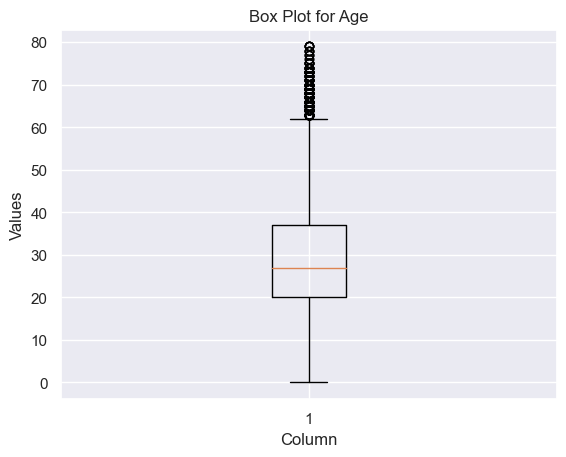

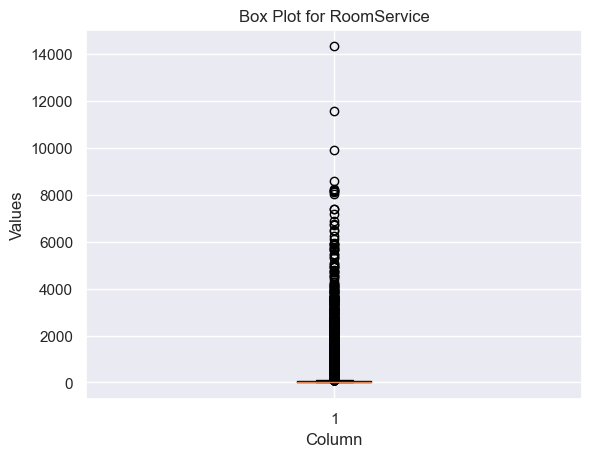

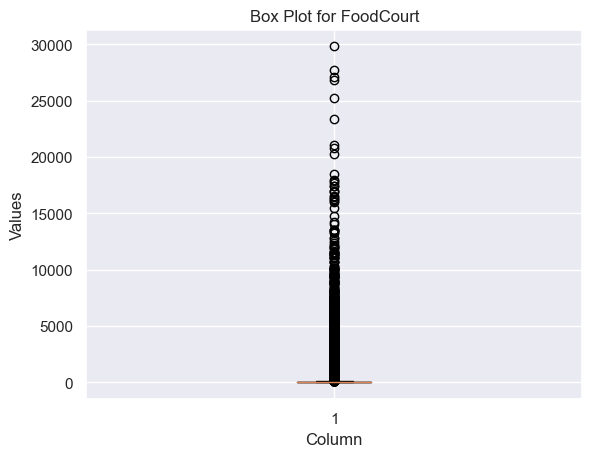

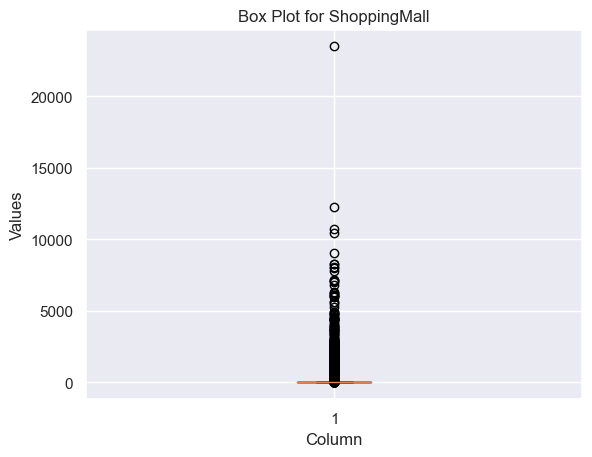

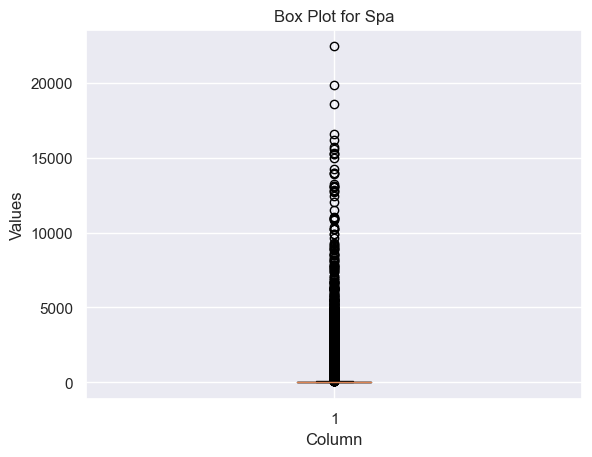

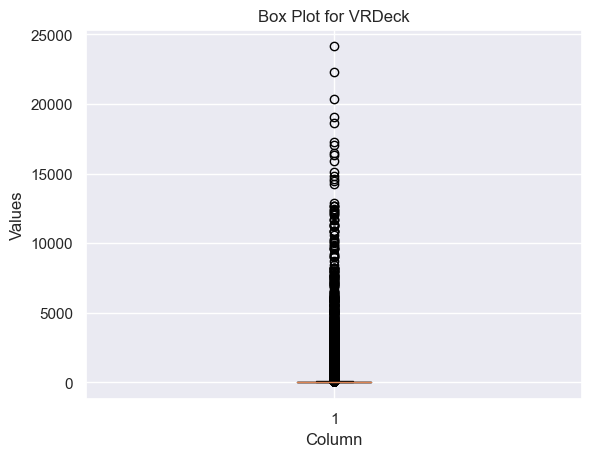

In [154]:
for column in numerical_variables:
    plt.figure()
    plt.boxplot(df[column])
    plt.title(f"Box Plot for {column}")
    plt.xlabel("Column")
    plt.ylabel("Values")
    plt.show()

In [155]:
# Cap RoomService at 9000
df.loc[df.RoomService.gt(9000), 'RoomService'] = 9000

# Cap FoodCourt at 22000
df.loc[df.FoodCourt.gt(22000), 'FoodCourt'] = 22000

# Cap ShoppingMall at 11000
df.loc[df.ShoppingMall.gt(11000), 'ShoppingMall'] = 11000

# Cap Spa at 17000
df.loc[df.Spa.gt(17000), 'Spa'] = 17000

# Cap VRDeck at 21000
df.loc[df.VRDeck.gt(21000), 'VRDeck'] = 21000

In [156]:
df2 = df.copy()

The log transform is used to transform the distribution of the data. It can be used to more accurately interpret the percentage changes in the data.
The z-score is used to compare and standardize data.

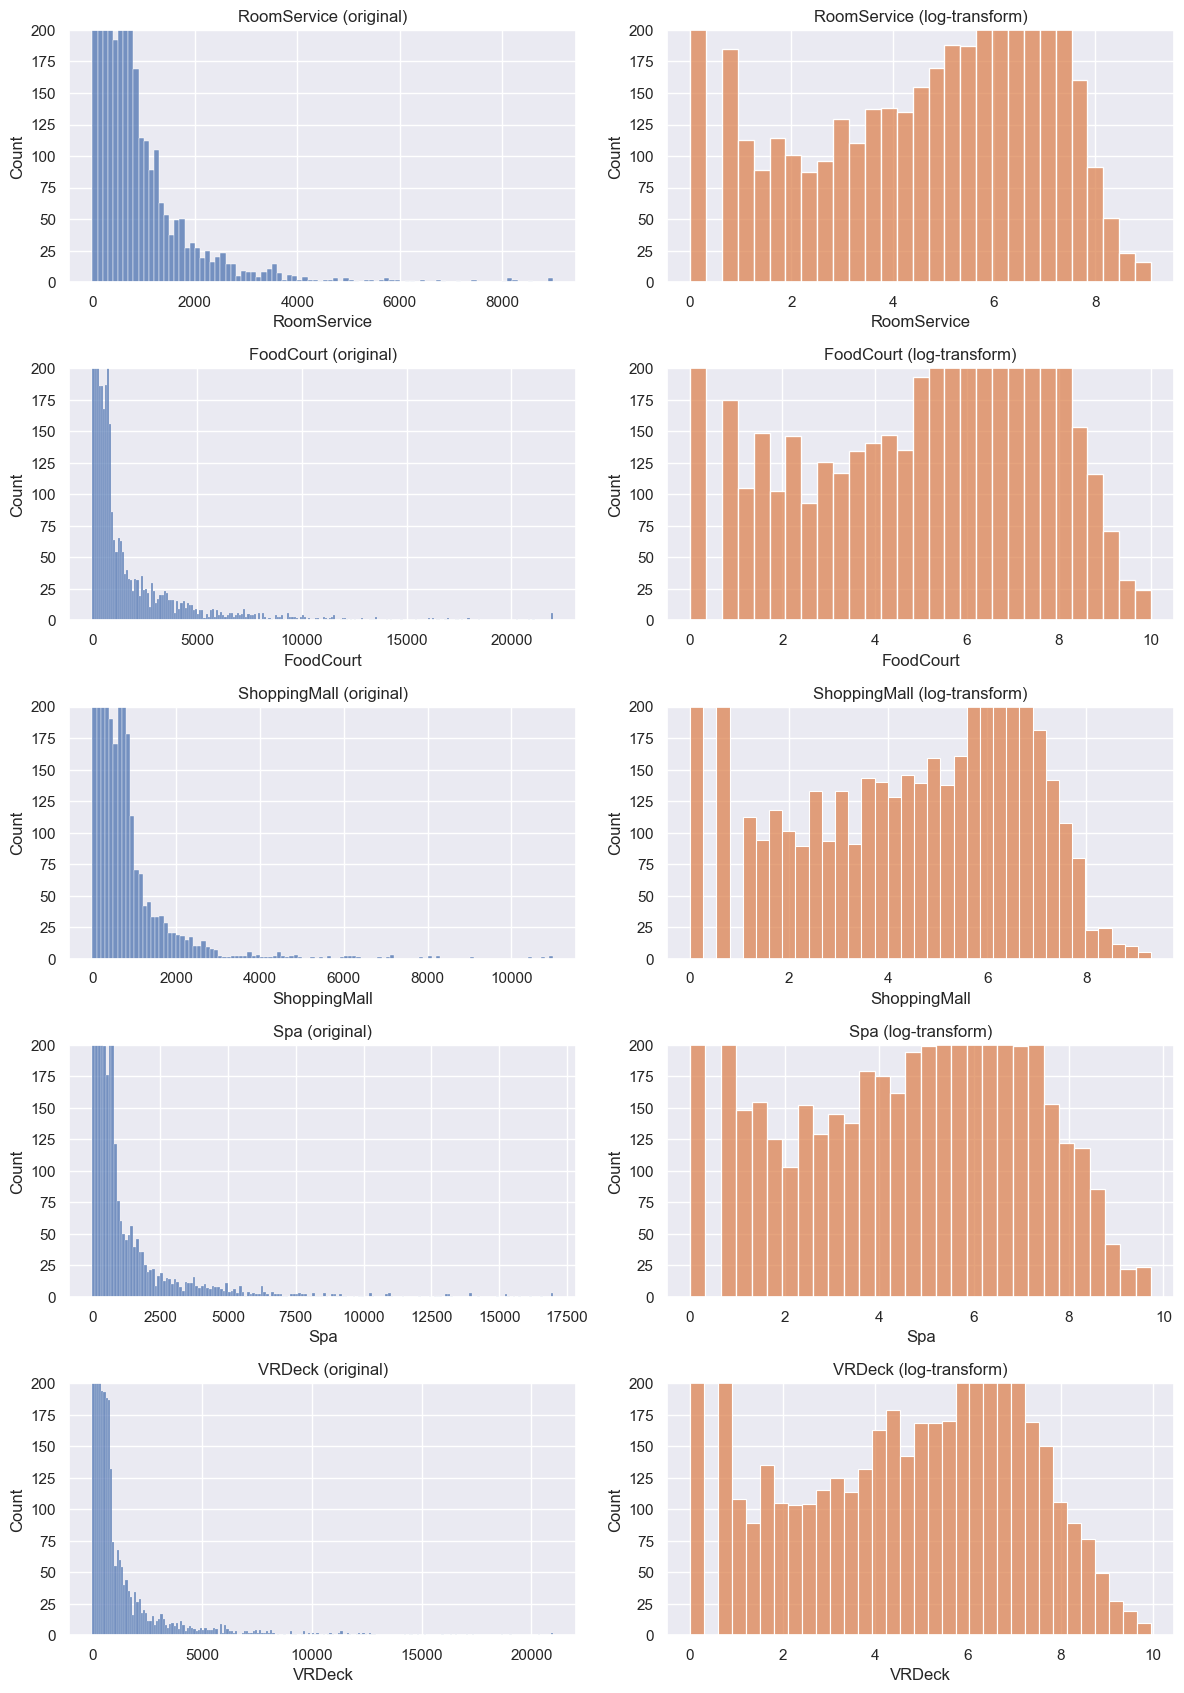

In [157]:
# Plot log transform results
fig=plt.figure(figsize=(12,20))
for i, col in enumerate(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']):
    plt.subplot(6,2,2*i+1)
    sns.histplot(df2[col], binwidth=100)
    plt.ylim([0,200])
    plt.title(f'{col} (original)')
    
    plt.subplot(6,2,2*i+2)
    sns.histplot(np.log(1+df2[col]), color='C1')
    plt.ylim([0,200])
    plt.title(f'{col} (log-transform)')
    
fig.tight_layout()
plt.show()

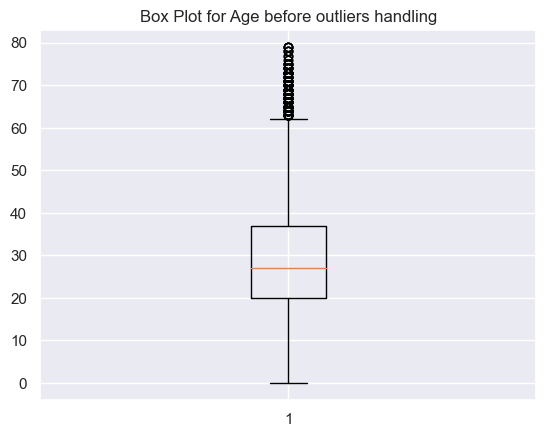

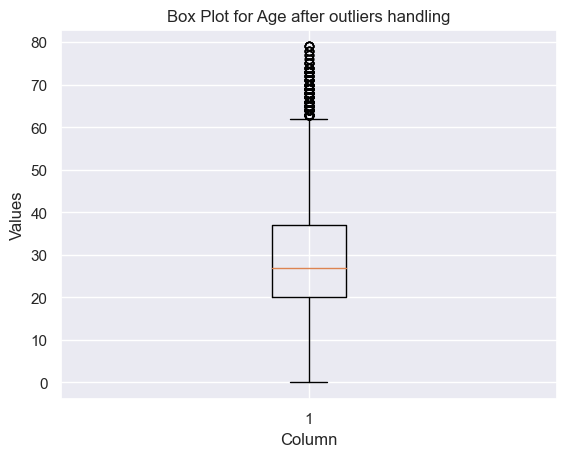

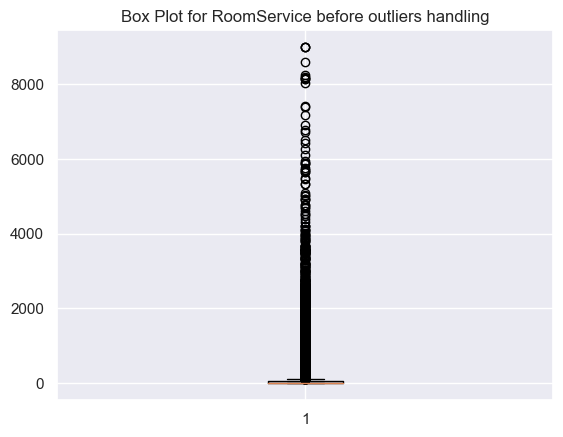

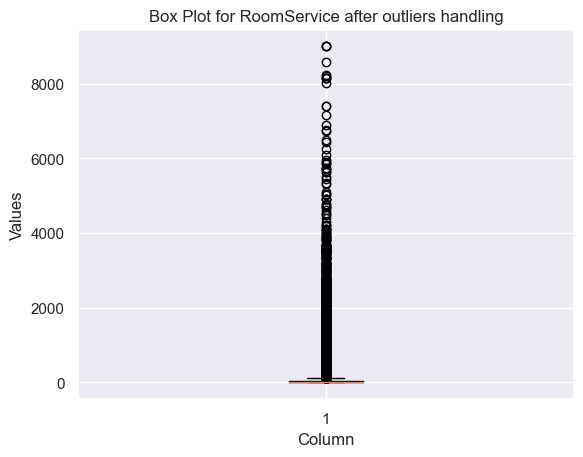

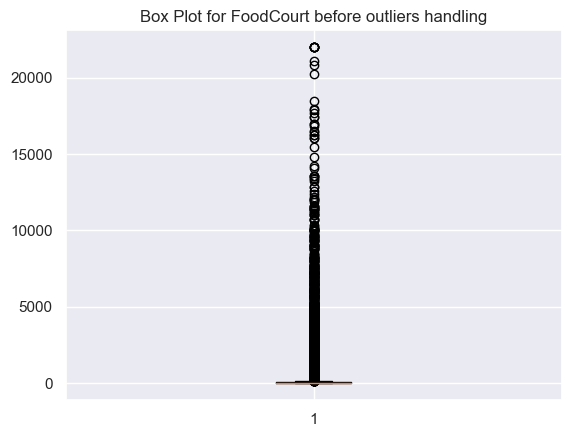

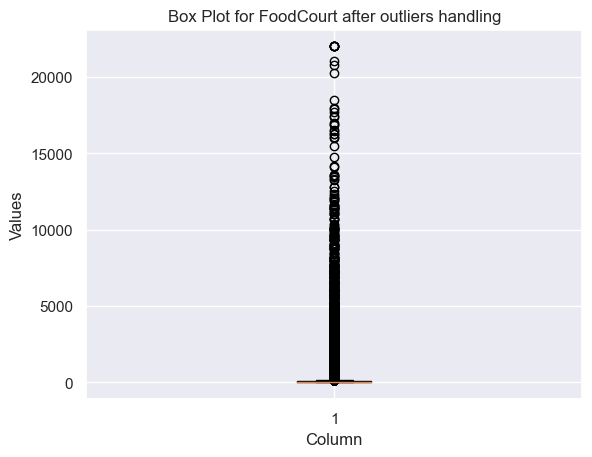

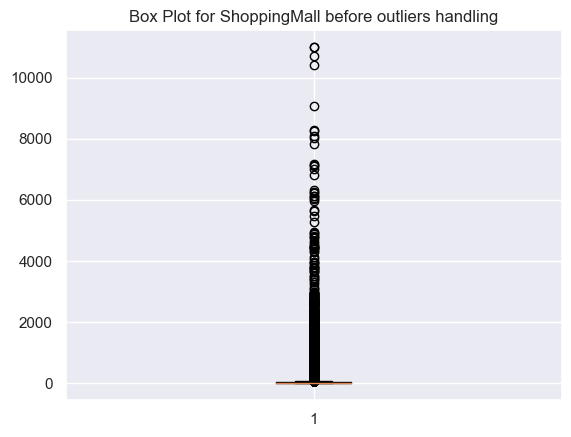

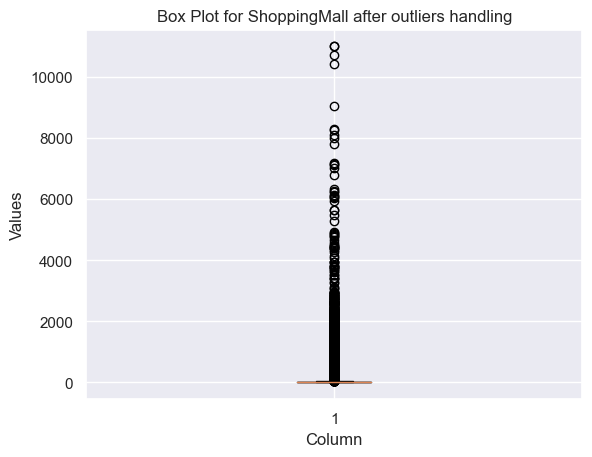

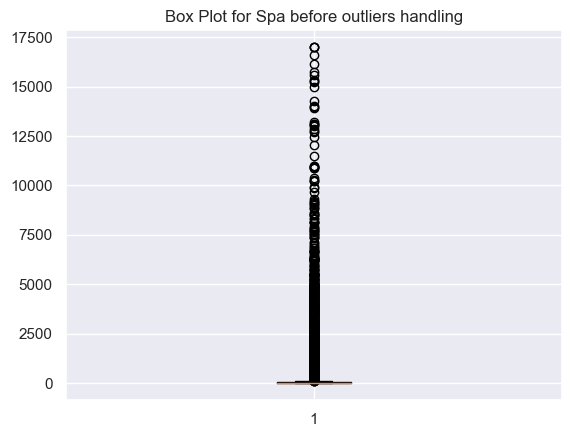

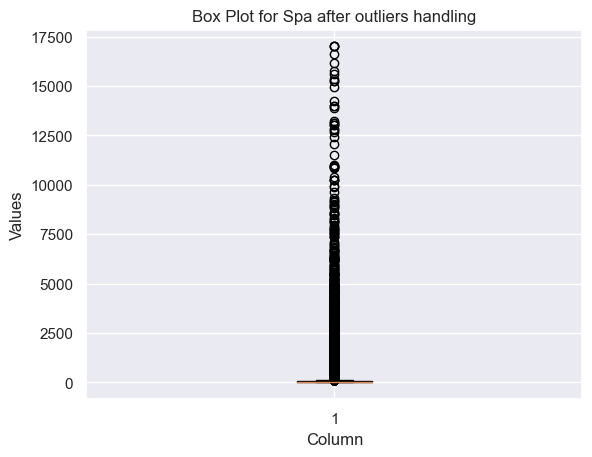

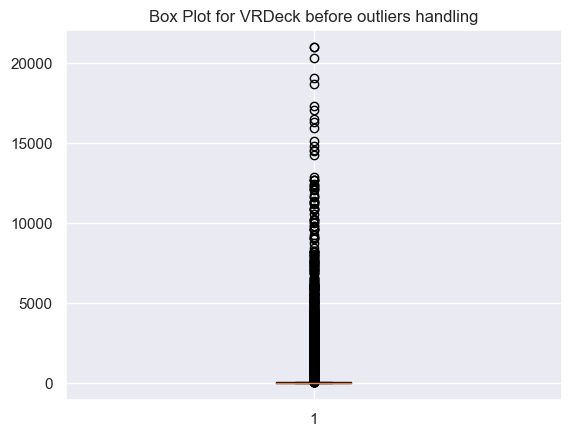

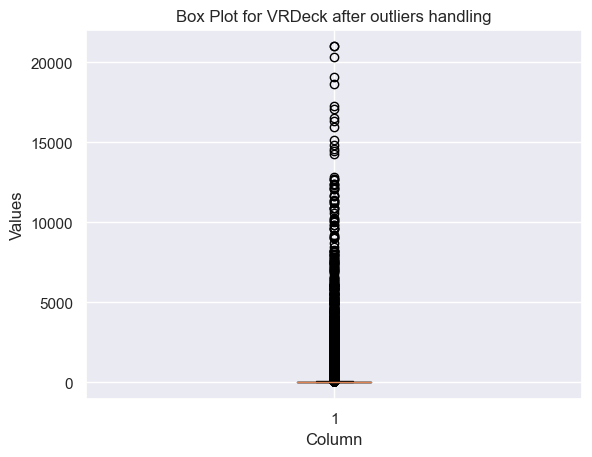

In [158]:
for column in numerical_variables:
    plt.figure()
    plt.boxplot(df[column])
    plt.title(f"Box Plot for {column} before outliers handling")
    plt.show()
    plt.boxplot(df2[column])
    plt.title(f"Box Plot for {column} after outliers handling")
    plt.xlabel("Column")
    plt.ylabel("Values")
    plt.show()

In [159]:
df2.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Number,Cabin_Side
0,0001_01,1,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,0,0
1,0002_01,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,5,0,1
2,0003_01,1,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1
3,0003_02,1,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1
4,0004_01,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,5,1,1


## Step 4: Check for Normality

Perform a normality check on the numerical features to assess if they follow a Gaussian distribution.
Use techniques like histograms, Q-Q plots, or statistical tests (e.g., Shapiro-Wilk test) to check for normality.

If the data is not normally distributed, consider applying appropriate transformations.

In [160]:
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\qwert\AppData\Local\Temp\ipykernel_9444\2399742392.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Number,Cabin_Side
HomePlanet,1.000000,0.088344,-0.033895,0.139169,0.119650,0.218702,0.063224,0.113238,0.049832,0.037640,0.073894,-0.394590,-0.197417,0.004367
CryoSleep,0.088344,1.000000,0.098933,-0.064196,-0.076891,-0.255277,-0.211828,-0.226686,-0.201096,-0.190821,0.319534,0.014223,-0.039509,0.011691
Destination,-0.033895,0.098933,1.000000,0.010306,0.037035,-0.046068,0.107451,-0.026746,0.067031,0.071834,0.083346,-0.193222,-0.107047,0.009863
Age,0.139169,-0.064196,0.010306,1.000000,0.080928,0.068331,0.122817,0.037918,0.115758,0.100483,-0.050216,-0.238574,-0.133922,0.014465
VIP,0.119650,-0.076891,0.037035,0.080928,1.000000,0.060852,0.120913,0.025693,0.081966,0.110540,-0.018345,-0.167610,-0.090311,-0.011078
RoomService,0.218702,-0.255277,-0.046068,0.068331,0.060852,1.000000,-0.020377,0.060077,0.007578,-0.023560,-0.176474,-0.023987,-0.008816,-0.009360
FoodCourt,0.063224,-0.211828,0.107451,0.122817,0.120913,-0.020377,1.000000,-0.001325,0.230480,0.246385,0.035165,-0.308992,-0.177584,0.009620
ShoppingMall,0.113238,-0.226686,-0.026746,0.037918,0.025693,0.060077,-0.001325,1.000000,0.012381,0.003862,0.002952,-0.026083,-0.007289,-0.018519
Spa,0.049832,-0.201096,0.067031,0.115758,0.081966,0.007578,0.230480,0.012381,1.000000,0.147068,-0.155274,-0.227614,-0.130156,0.005888
VRDeck,0.037640,-0.190821,0.071834,0.100483,0.110540,-0.023560,0.246385,0.003862,0.147068,1.000000,-0.142808,-0.249216,-0.134465,0.004888


In [161]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Perform normality tests for each numeric column
data = df2['Age']

# Shapiro-Wilk test
shapiro_stat, shapiro_pvalue = stats.shapiro(data)
shapiro_normal = shapiro_pvalue > 0.05

 # Anderson-Darling test
anderson_stat, anderson_crit, anderson_sign = stats.anderson(data)
anderson_normal = anderson_stat < anderson_crit[anderson_sign == 15][0]

# D'Agostino's K^2 test
dagostino_stat, dagostino_pvalue = stats.normaltest(data)
dagostino_normal = dagostino_pvalue > 0.05

 # Jarque-Bera test
jarquebera_stat, jarquebera_pvalue = stats.jarque_bera(data)
jarquebera_normal = jarquebera_pvalue > 0.05

#print(f"Column: {Age}")
print(f"Shapiro-Wilk test - Normal: {shapiro_normal}")
print(f"Anderson-Darling test - Normal: {anderson_normal}")
print(f"D'Agostino's K^2 test - Normal: {dagostino_normal}")
print(f"Jarque-Bera test - Normal: {jarquebera_normal}")


Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False


C:\Users\qwert\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


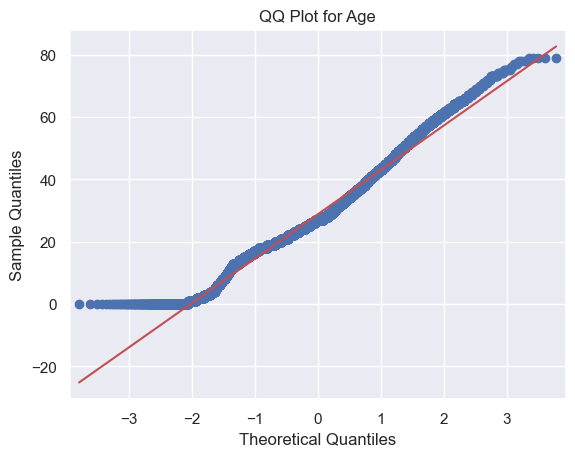

In [162]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create QQ plot for Age column
sm.qqplot(df2["Age"], line='s')
plt.title("QQ Plot for Age")
plt.show()


## Step 5: Apply Transformations

Apply transformations to the data if required, based on the normality check results.

Common transformations include:

* Logarithmic transformation: Use when data is positively skewed.
* Square root transformation: Use when data has a moderate positive skew.
* Power transformation: Use when data has a severe positive or negative skew.

Apply the chosen transformation(s) to the appropriate features.

Categorical values cannot be normalized. Transformation and normalization were not performed because the distribution of the age column was very close to the normal distribution.

## Step 6: Split the Data

Split the preprocessed and transformed data into training and testing sets.
Typically, use around 70-80% of the data for training and the remaining for testing.

In [163]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

X = df2.drop("Transported", axis=1)
y = df2["Transported"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42) 
#test size bütün datanın %20 sini train ederken görme. Onu test te kullanacağım. 
print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (10376, 14)
y_train (10376,)
X_test (2594, 14)
y_test (2594,)
training (12970, 15)


## Step 7: Select a Suitable Algorithm

Determine the appropriate algorithm(s) for this binary classification problem.
Consider algorithms like **Logistic Regression, Decision Trees, Random Forests, or Support Vector Machines.**
Choose an algorithm that suits the problem requirements and constraints.

In [164]:
#Fit a few models: Logistic Regression, Random Forest, Gradient Boosting
lg = LogisticRegression()
lg.fit(X_train,y_train)
lg_pred_score = lg.score(X_test,y_test)

In [165]:
# fitting random forest model
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred_score = rf.score(X_test,y_test)

In [166]:
# fitting Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred_score = gb.score(X_test,y_test)

In [167]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
svc_pred_score = svc.score(X_test,y_test)

In [169]:
df2 = pd.DataFrame(dict(model=['Logistic Regression', 
                              'Random Forest', 
                              'Gradient Boosting',
                              'SVM'],accuracy=[lg_pred_score, rf_pred_score, 
                                               gb_pred_score, svc_pred_score]))
df2

,model,accuracy
0,Logistic Regression,0.682729
1,Random Forest,0.724364
2,Gradient Boosting,0.730146
3,SVM,0.657672


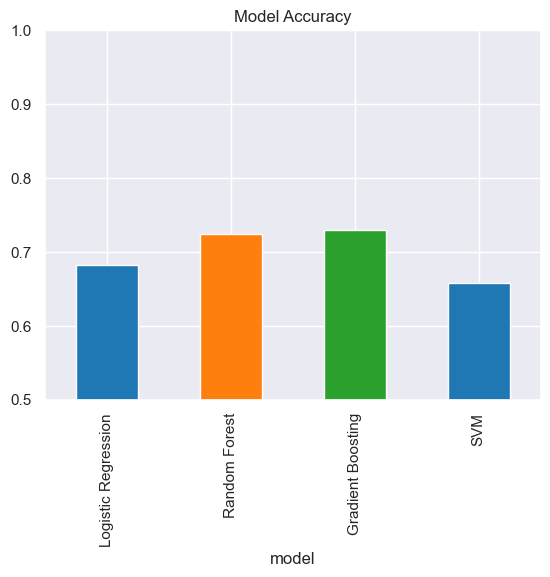

In [170]:
df2.plot(kind='bar',x='model',y='accuracy',title='Model Accuracy',legend=False,
        color=['#1F77B4', '#FF7F0E', '#2CA02C'])
plt.ylim(0.5,1);

## Step 8: Train the Model

Train the selected algorithm on the training dataset.
Adjust hyperparameters if necessary to optimize model performance.
Evaluate the model's performance using suitable metrics (accuracy, precision, recall, etc.).

In [171]:
y_pred =  gb.predict(X_train)

In [172]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Accuracy Score:", accuracy)

Precision Score: 0.6716899892357373
Recall Score: 0.5363896848137536
F1 Score: 0.5964632786362911
Accuracy Score: 0.7558789514263685


# Step 9: Validate the Model

Use the testing dataset to validate the model's performance.
Calculate the same metrics as in step 8 to assess the model's accuracy and generalization ability.
Identify any issues like overfitting or underfitting.

In [173]:
y_pred =  gb.predict(X_test)

In [174]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Accuracy Score:", accuracy)

Precision Score: 0.6378299120234604
Recall Score: 0.48986486486486486
F1 Score: 0.554140127388535
Accuracy Score: 0.7301464919043947


## Step 10: Fine-tune and Optimize the Model

If needed, fine-tune the model by adjusting hyperparameters or trying different algorithms.
Employ techniques like cross-validation or grid search to find the best hyperparameters.
Iterate this process until you achieve satisfactory performance.

In [175]:
model = gb.fit(X_train,y_train)

In [176]:
parameters = {
    'n_estimators': [200],  # Farklı ağaç sayıları deneyebilirsiniz
    'learning_rate': [0.01],  # Öğrenme oranı
    'max_depth': [5],  # Ağaçların maksimum derinliği
    'random_state': [24], 
}

In [177]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model, parameters, cv=5)#burdaki parametreleri yukarıdan getirdik
grid_search.fit(X_train, y_train) #yukarıda belirttiğimiz parameteretreleri x_train ve y_train e uygula 

# Print the best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_) #Model için en işe yarar parametreleri bulmak için.
#en çok zaman kaybedilen yer burası. bazen random search de kullanılır.

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'random_state': 24}


## Step 11: Evaluate the Final Model

Evaluate the final model on the testing dataset once again.
Calculate relevant metrics to assess the model's accuracy, precision, recall, etc.
Interpret the model's predictions and document the results.


In [178]:
#best_estimator yeni bir özellik. yukarıdan alarak yerleştiriyor.
best_model = grid_search.best_estimator_
y_pred_best_model = best_model.predict(X_test) # X_testleri tekrar test yapsın.
y_pred_best_model

array([ True, False, False, ..., False,  True,  True])

In [179]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Accuracy Score:", accuracy)

Precision Score: 0.6378299120234604
Recall Score: 0.48986486486486486
F1 Score: 0.554140127388535
Accuracy Score: 0.7301464919043947


## Step 12: Communicate the Findings

Prepare a report or presentation summarizing the project's objectives, methodology, and results.
Clearly communicate the insights gained from the model, such as the importance of different features in predicting survival.
Provide recommendations or potential applications based on the findings.

## Step 13: Reflect and Learn

Reflect on the entire process and discuss the strengths and limitations of the project.
Identify areas for improvement and suggest future work or possible enhancements.
Share any lessons learned from the project to inform future endeavors.
Remember, adapt this guide based on the specific requirements and learning goals of your charity data bootcamp organization.